In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
filter.warnings("ignore")

AttributeError: type object 'filter' has no attribute 'warnings'

In [2]:
df=pd.read_csv("delivery_time.csv")

In [3]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [20]:
 df = df.rename(columns={'Delivery Time': 'Deliverytime','Sorting Time':'Sortingtime'})

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Deliverytime  21 non-null     float64
 1   Sortingtime   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
df.size

42

In [7]:
df.shape

(21, 2)

In [22]:
df.describe()

,Deliverytime,Sortingtime
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [9]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


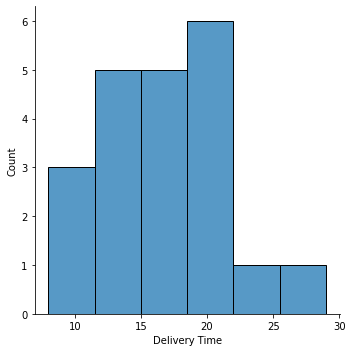

In [10]:
sns.displot(df["Delivery Time"])

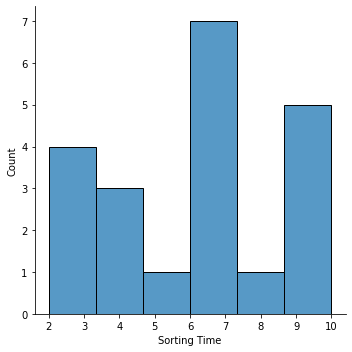

In [11]:
sns.displot(df["Sorting Time"])

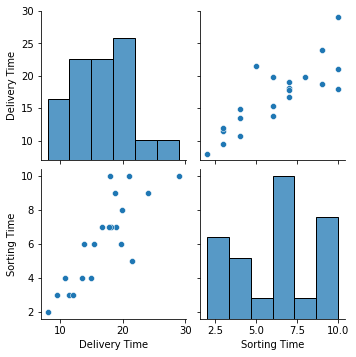

In [12]:
sns.pairplot(df)

<AxesSubplot:>

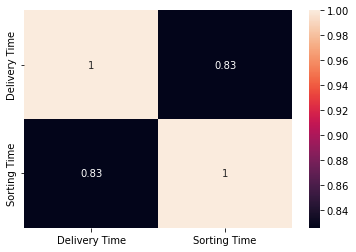

In [13]:
sns.heatmap(df.corr(),annot=True)

In [14]:
import statsmodels.formula.api as smf


In [25]:
model=smf.ols("Deliverytime~Sortingtime",data=df).fit()
model

In [26]:
model.params

Intercept      6.582734
Sortingtime    1.649020
dtype: float64

In [27]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Deliverytime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 09 Dec 2022   Prob (F-statistic):           3.98e-06
Time:                        17:00:57   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.5827      1.722      3.823      0.001       2.979      10.186
Sortingtime     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\UMANA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sortingtime', ylabel='Deliverytime'>

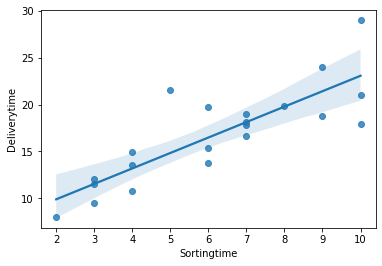

In [29]:
sns.regplot(df["Sortingtime"],df["Deliverytime"])

In [33]:
newdata=pd.DataFrame([5,7,3],columns=["Sortingtime"])

In [34]:
newdata

,Sortingtime
0,5
1,7
2,3


In [48]:
dt_pred=model.predict(newdata)

In [49]:
dt_pred=pd.DataFrame(dt_pred,columns=["deliverytime"])

In [50]:
dt_Pred

0    14.827833
1    18.125873
2    11.529794
dtype: float64

In [51]:
model=smf.ols("Deliverytime~np.sqrt(Sortingtime)",data=df).fit()
model

In [52]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Deliverytime   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Fri, 09 Dec 2022   Prob (F-statistic):           2.61e-06
Time:                        17:14:29   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -2.5188      2.995     -0.841      0.411      -8.788       3.751
np.sqrt(Sortingtime)     7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
model=smf.ols("Deliverytime~np.square(Sortingtime)",data=df).fit()
model

In [54]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Deliverytime   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     32.39
Date:                Fri, 09 Dec 2022   Prob (F-statistic):           1.74e-05
Time:                        17:15:41   Log-Likelihood:                -52.948
No. Observations:                  21   AIC:                             109.9
Df Residuals:                      19   BIC:                             112.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 11.2372      1.196      9.399      0.000       8.735      13.740
np.square(Sortingtime)     0.1249      0.022      5.691      0.000       0.079       0.171
==============================================================================
Omnibus:                        1.531   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.465   Jarque-Bera (JB):                0.772
Skew:                           0.469   Prob(JB):                        0.680
Kurtosis:                       3.050   Cond. No.                         94.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
model=smf.ols("Deliverytime~log(Sortingtime)",data=df).fit()
model

PatsyError: Error evaluating factor: NameError: name 'log' is not defined
    Deliverytime~log(Sortingtime)
                 ^^^^^^^^^^^^^^^^